In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
 random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [3]:
# 스케일링 조정기법
# MinMaxScaler : 모든 특성을 0과 1사이에 위치하도록 변경  
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # 훈련데이터만 스케일링하고, 테스트데이터는 스케일링 하지 않음

In [4]:
scaler.fit(X_train)

MinMaxScaler()

In [5]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일링이 조정된 데이터셋의 속성을 출력
print("변환된 후 크기 : {}".format(X_train_scaled.shape))
print("조정 전 특성별 최솟값 :\n {}".format(X_train.min(axis=0)))
print("조정 전 특성별 최댓값 :\n {}".format(X_train.max(axis=0)))
print("조정 후 특성별 최솟값 :\n {}".format(X_train_scaled.min(axis=0)))
print("조정 후 특성별 최댓값 :\n {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기 : (426, 30)
조정 전 특성별 최솟값 :
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 6.251e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
조정 전 특성별 최댓값 :
 [2.811e+01 3.928e+01 1.885e+02 2.499e+03 1.425e-01 3.454e-01 4.264e-01
 1.913e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.256e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.313e+01
 4.954e+01 2.293e+02 3.432e+03 2.184e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
조정 후 특성별 최솟값 :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
조정 후 특성별 최댓값 :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# SVM을 적용하려면 테스트데이터셋도 변환(스케일링)해야한다.
X_test_scaled = scaler.transform(X_test)
# 스케일링이 조정된 테스트셋의 속성을 출력
print("조정 전 특성별 최솟값 :\n {}".format(X_test_scaled.min(axis=0)))
print("조정 전 특성별 최댓값 :\n {}".format(X_test_scaled.max(axis=0)))

조정 전 특성별 최솟값 :
 [ 0.03686876  0.03990531  0.02853984  0.01592019 -0.12351544  0.03613275
  0.          0.          0.10808081  0.01010952  0.00184682  0.00041991
  0.00067851 -0.0008218   0.0399089   0.0112206   0.          0.
  0.0414814   0.00191396  0.06055556  0.0554371   0.04891274  0.02568683
  0.11865788  0.01833687  0.          0.          0.08318549  0.02813853]
조정 전 특성별 최댓값 :
 [0.96734346 0.66351031 0.9889434  1.00084908 1.26128266 0.89571192
 1.00093809 1.05175118 0.80555556 0.94903117 0.88194822 0.60992751
 0.84309476 1.03202333 0.7348472  0.71956019 0.32272727 0.66054177
 0.5289019  0.35947929 1.11547619 0.79504264 1.1224216  1.25317235
 1.02852679 0.81575807 0.74976038 0.92371134 0.628425   0.57759412]


- 일부 특성이 0~1 범위를 벗어났다
- MinMaxScaler는(다른 모든 스케일 모델도) 항상 훈련세트와 테스트 세트에 같은 변환을 적용해야한다.
- transform 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고 항상 훈련세트의 최솟값을 빼고 훈련 세트의 범위로 나눈다

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

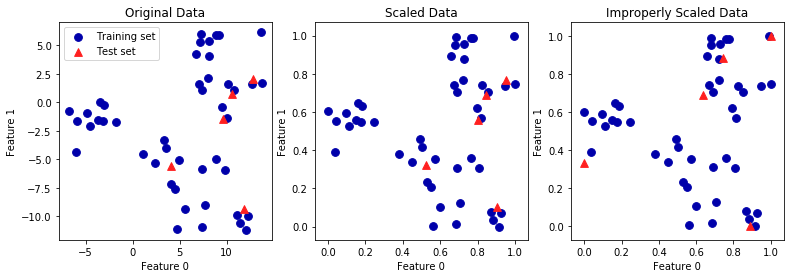

In [10]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs
import mglearn

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 시각화
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# 테스트 데이터를 따로 조정
# 테스트 데이터의 최솟값 0 , 최댓값 1로 조정
# 예제를 위해서 사용한것일 뿐, 절대로 사용하면 안됨!!
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 시각화
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [11]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)             # C : 규제 penalty - 숫자가 작을수록 규제 강함
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [12]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [13]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


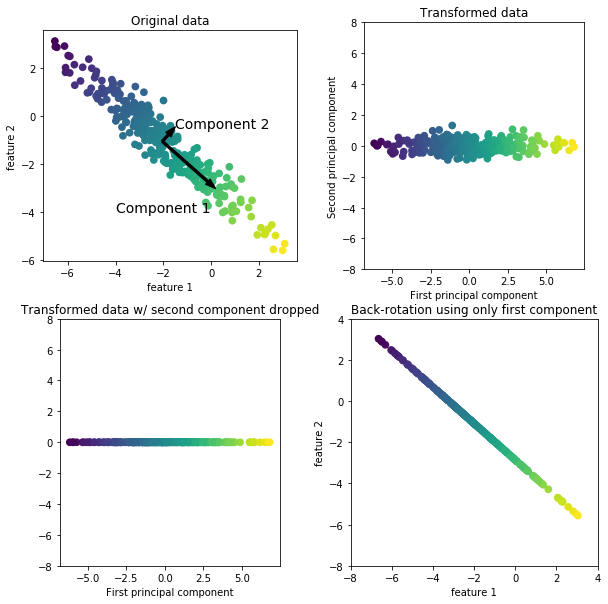

In [14]:
mglearn.plots.plot_pca_illustration()

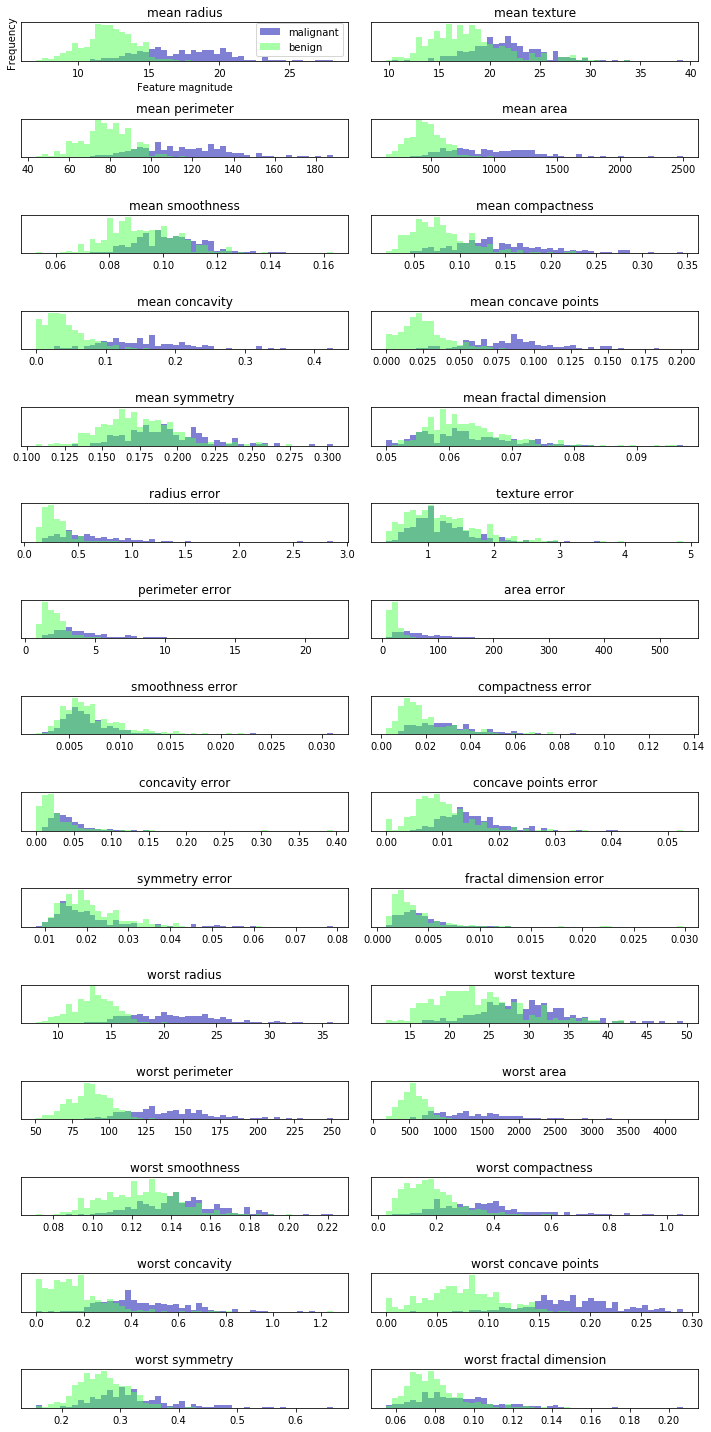

In [15]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()